# 1. Simple NumPy function

As a warmup exercise, print the five dimensional identity matrix.

In [6]:
%xmode plain

import numpy as np

np.eye(5)

Exception reporting mode: Plain


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

Note that [numpy.identity()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html) could also be used but appears to offer [no real advantage](https://stackoverflow.com/questions/28363447/what-are-the-advantages-of-using-numpy-identity-over-numpy-eye).

# 2. Linear regression with one variable

Consider a company which operates food trucks in multiple cities, and wishes to determine which new city to open a food truck in. The profit of the food truck can be (simplistically) predicted by the population of the city the truck operates in. We have a two dimensional dataset with one independent variable (Population) and one dependent variable (Profit).

In [8]:
import pandas as pd

data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


None

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 2.1 Plotting the data

Plotting the profit of a food truck against the population of the city it operates in shows what appears to be a linear relationship.

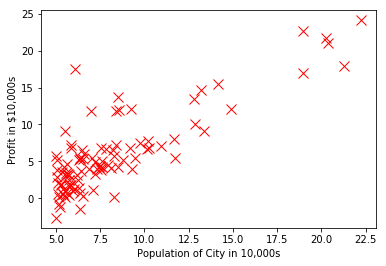

In [7]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(data['Population'], data['Profit'], 'rx', markersize=10);

## 2.2 Gradient descent

We will use a linear model of the form $h_{\theta}(x) = \theta_0 + \theta_1 x_1$ to predict food truck profits.

### 2.2.1 Update equations

Define the cost function, making use of the `@` operator for the dot product ([new in Python 3.5](https://docs.python.org/3/whatsnew/3.5.html#whatsnew-pep-465)).

$J(\theta) = \frac{1}{2m} \sum\limits_{i=0}^{m} (h_{\theta}(x^{i}) - y^{i})^2$

In [20]:
def compute_cost(X, y, theta):
    return (1 / (2 * m)) * ((X @ theta - y) ** 2).sum()

### 2.2.2 Implementation

We want our parameters represented as a column vector, which necessitates using a two-dimensional ndarray since a one-dimensional array cannot reliably be interpreted as either a row or a column vector.

In [39]:
theta = np.zeros(2).reshape(-1, 1)
theta

array([[ 0.],
       [ 0.]])

Note that we prepend a column of ones to the array of feature vectors to account for the bias term in the model.

In [36]:
m = len(data)
X = np.stack([np.ones(m), data['Population']], axis=1)
y = data['Profit'].values.reshape(-1, 1) # Want a column vector, not a row vector
display(X.shape)
display(y.shape)

(97, 2)

(97, 1)

### 2.2.3 Computing the cost $J(\theta)$

Test the cost function and initial parameter vector.

In [40]:
compute_cost(X, y, theta)

32.072733877455676

### 2.2.4 Gradient descent

Implement the gradient descent algorithm to obtain the fitted parameter vector. This is done by repeatedly subtracting the gradient of the cost function, multiplied by the learning rate $\alpha$, from the parameter vector:

$\theta_{j} = \theta_{j} - \alpha \frac{1}{m} \sum\limits_{i=0}^{m} (h_{\theta}(x^{i}) - y^{i}) x_{j}^{i}$

In [99]:
iterations = 1500
alpha = 0.01

J_history = np.zeros(iterations)

def gradient_descent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        theta = theta - alpha * (1 / m) * ((X @ theta - y) * X).sum(axis=0).reshape(-1, 1);
        J_history[i] = compute_cost(X, y, theta);
    return theta
    
theta = np.zeros(2).reshape(-1, 1) # Re-initialize theta to default values
theta = gradient_descent(X, y, theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

Plot the value of the cost function relative to the number of iterations.

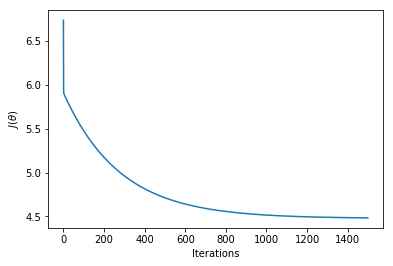

In [45]:
plt.xlabel('Iterations')
plt.ylabel(r'$J(\theta)$')
plt.plot(J_history);

Now plot the fitted model.

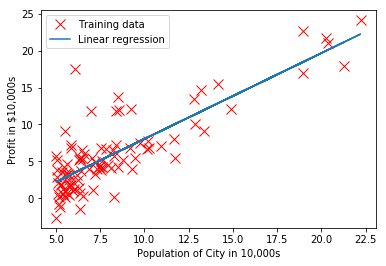

In [28]:
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(data['Population'], data['Profit'], 'rx', markersize=10)
plt.plot(X[:, 1], X @ theta)
plt.legend(['Training data', 'Linear regression']);

Make a couple of predictions using our model, multiplying by 10,000 to give an answer in dollars.

In [32]:
np.array([1, 3.5]) @ theta * 10000

array([ 4519.7678677])

In [33]:
np.array([1, 7]) @ theta * 10000

array([ 45342.45012945])

## 2.3 Debugging

Nothing to do here.

## 2.4 Visualizing $J(\theta)$

Compute the value of the cost function of a range of parameter values.

In [49]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros(len(theta0_vals) * len(theta1_vals)).reshape(len(theta0_vals), len(theta1_vals))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(-1, 1)
        J_vals[i, j] = compute_cost(X, y, t)
        
J_vals

array([[ 328.09290555,  316.6648683 ,  305.44447299, ...,  186.35412584,
         195.06735595,  203.98822799],
       [ 323.26504192,  311.92025945,  300.7831189 , ...,  189.60197489,
         198.39845977,  207.40258658],
       [ 318.47799046,  307.21646275,  296.16257698, ...,  192.89063611,
         201.77037576,  210.85775734],
       ..., 
       [  49.81156018,   46.45923561,   43.31455298, ...,  691.41691065,
         708.20585345,  725.20243817],
       [  48.94247627,   45.67340647,   42.61197861, ...,  698.62353943,
         715.49573699,  732.57557648],
       [  48.11420452,   44.9283895 ,   41.95021641, ...,  705.87098036,
         722.82643269,  739.98952696]])

Make a surface plot of the cost function. J_vals needs to be transposed for reasons I don't fully understand.

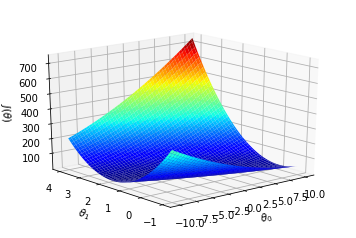

In [106]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel(r'$\theta_{0}$')
ax.set_ylabel(r'$\theta_{1}$')
ax.set_zlabel(r'$J(\theta)$')
ax.view_init(20, 230)

t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(t0, t1, J_vals.T, cmap='jet');

Contour plot of the cost function and fitted parameter values at the minimum of the cost function.

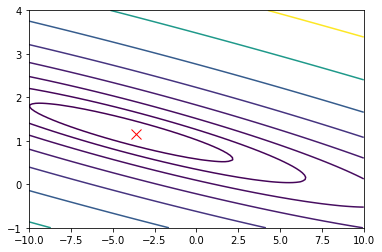

In [107]:
plt.plot(theta[0][0], theta[1][0], 'rx', markersize=10)
plt.contour(t0, t1, J_vals.T, np.logspace(-2, 3, 20));